# Analisi dei Dati di Steam

## Introduzione
In questo elaborato vogliamo analizzare il dataset `steam.csv` esplorando le caratteristiche dei giochi presenti sulla piattaforma Steam, il più grande marketplace digitale di videogiochi per PC al mondo, per farlo applicheremo le tecniche di Data Analytics studiate durante il corso, in particolare quelle di

- **Caricamento ed esplorazione** dei dati grezzi
- **Pulizia e preparazione** del dataset
- **Analisi esplorativa (EDA)** per identificare pattern e tendenze
- **Market Basket Analysis** per scoprire regole di associazione tra generi
- **Clustering** per segmentare i giochi in gruppi omogenei

Il nostro obiettivo quindi è quello di analizzare il dataset per ricavare insight che potrebbero essere utili sia per sviluppatori che per publisher nel mercato del gaming.

## 1. Caricamento e Prima Esplorazione del Dataset

In questa prima fase abbiamo caricato il dataset `steam.csv` e condotto un'esplorazione iniziale per farci un'idea chiara dei dati a disposizione:

- Abbiamo visualizzato le prime e ultime righe per capire la struttura generale
- Abbiamo identificato le variabili chiave come nome, genere, prezzo e valutazioni
- Abbiamo cercato eventuali anomalie o valori particolari che potrebbero influenzare le analisi

In [2]:
import pandas as pd

# Caricamento del dataset
df = pd.read_csv('steam.csv')

# Prime 10 righe
df.head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


**Osservazioni:**  
Dall'esplorazione iniziale abbiamo scoperto che il dataset contiene ben 27.075 giochi con informazioni dettagliate che abbiamo organizzato in categorie logiche:

- **Identificazione**: `appid`, `name` 
- **Pubblicazione**: `release_date`, `developer`, `publisher`
- **Caratteristiche tecniche**: `platforms`, `required_age`
- **Categorizzazione**: `genres`, `categories`, `steamspy_tags`
- **Metriche di engagement**: `achievements`, `positive_ratings`, `negative_ratings`, `average_playtime`, `median_playtime`
- **Informazioni commerciali**: `owners`, `price`

Fortunatamente il dataset è molto ricco ee permette quindi un'analisi da diversi punti di vista, possiamo analizzarlo in base ad aspetti tecnicei, commerciali o di coinvoglimento degli utenti

### Valori Mancanti
Prima di procedere con le analisi, abbiamo voluto verificare la presenza di valori mancanti nel dataset. Abbiamo quindi esaminato ogni colonna per:
- Capire quanti valori mancanti ci sono
- Valutare se questi potrebbero influenzare le nostre analisi
- Decidere come gestirli (eliminarli, sostituirli o altro)


In [3]:
# Informazioni generali
df.info()

# Valori mancanti
print("\nValori mancanti:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

**Osservazioni:**  
Dopo l'analisi possiamo notare quindi che il dataset è quasi completamente privo di valori mancanti:

- Abbiamo trovato valori null solo in due colonne: `developer` (1 record) e `publisher` (14 record)
- Tutte le altre 16 colonne sono complete al 100%
- I valori mancanti rappresentano una percentuale minima del dataset (0.004% per developer, 0.05% per publisher)

### Statistiche descrittive
Il prossimo passo è stato analizzare le statistiche descrittive delle variabili numeriche. Volevamo:

- **Capire come sono distribuiti i dati** guardando media, mediana, valori minimi e massimi
- **Individuare eventuali valori anomali** che potrebbero distorcere le nostre analisi
- **Caratterizzare il mercato di Steam** in termini di prezzi, popolarità e tempo di gioco

Questo primo sguardo alle statistiche descrittive ci permette di avere una prima idea generale dei valori che ognuno degli attibuti assume nel dataset

In [68]:
# Statistiche descrittive
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


**Osservazioni:**  
Analizzando queste statistiche, abbiamo scoperto alcune caratteristiche davvero interessanti del mercato videoludico su Steam:

- **Struttura di prezzo**: 
  - C'è una forte asimmetria nei prezzi: la media è di circa €6, ma la mediana è solo €3.99
  - Molti giochi sono gratuiti (prezzo minimo €0)
  - Esiste una nicchia di giochi premium con prezzi molto alti (fino a €421.99)

- **Pattern di valutazione**:
  - Le recensioni sono distribuite in modo estremamente disuguale
  - Pochissimi giochi hanno un enorme numero di valutazioni (alcuni superano i 2 milioni di recensioni positive)
  - La maggior parte dei giochi riceve poche recensioni (mediana: 24 positive, 9 negative)

- **Coinvolgimento degli utenti**:
  - Gli achievements variano enormemente (da 0 a ben 9821)
  - Ci sono outlier impressionanti nel tempo di gioco (fino a 190.625 ore, che equivale a giocare ininterrottamente per oltre 21 anni)
  - Alcuni valori estremi potrebbero essere anomalie nei dati

- **Accessibilità**: La maggior parte dei giochi non ha restrizioni d'età (required_age = 0)

Questi dati ci hanno fatto capire che Steam è un mercato "winner-takes-all", pochi titoli di grande successo e una lunghissima coda di giochi con visibilità e coinvolgimento limitati.

## 2. Pulizia dei Dati

Dopo la fase esplorativa, abbiamo proceduto con alcune operazioni di pulizia per ottimizzare il dataset:

- **Rimozione di variabili inutili**: Abbiamo eliminato la colonna `english` perché era una semplice variabile booleana che non aggiungeva valore alle nostre analisi
- **Gestione dei valori mancanti**: Abbiamo sostituito i pochi valori null in `developer` e `publisher` con l'etichetta "Sconosciuto"
- **Correzione delle inconsistenze tra generi e tag**: Abbiamo risolto il problema dei generi che non apparivano nei tag corrispondenti

In [69]:
# Correggiamo il problema dei generi che non appaiono nei tag
# Questo è importante perché ogni genere dovrebbe essere presente anche nei tag

# Funzione per verificare e aggiungere i generi mancanti ai tag
def add_missing_genres_to_tags(row):
    # Estrai liste di generi e tag
    genres_list = [g.strip() for g in row['genres'].split(';')]
    tags_list = [t.strip() for t in row['steamspy_tags'].split(';')]
    
    # Identifica generi mancanti nei tag
    missing_genres = [genre for genre in genres_list if genre not in tags_list]
    
    # Se ci sono generi mancanti, aggiungili ai tag
    if missing_genres:
        # Aggiungi i generi mancanti all'inizio della lista dei tag
        updated_tags = missing_genres + tags_list
        # Rimuovi eventuali duplicati mantenendo l'ordine
        updated_tags = list(dict.fromkeys(updated_tags))
        # Unisci la lista in una stringa separata da punto e virgola
        return ';'.join(updated_tags)
    else:
        # Se non ci sono generi mancanti, restituisci i tag originali
        return row['steamspy_tags']

# Verifica quanti giochi hanno generi mancanti nei tag PRIMA di applicare la correzione
def has_missing_genres(row):
    genres_set = set(g.strip() for g in row['genres'].split(';'))
    tags_set = set(t.strip() for t in row['steamspy_tags'].split(';'))
    return not genres_set.issubset(tags_set)

# Conta i giochi con generi mancanti nei tag
missing_count = df.apply(has_missing_genres, axis=1).sum()
print(f"Numero di giochi con generi mancanti nei tag: {missing_count}")
print(f"Percentuale sul totale: {missing_count / len(df) * 100:.2f}%")

# Ora applica la correzione
df['steamspy_tags'] = df.apply(add_missing_genres_to_tags, axis=1)

Numero di giochi con generi mancanti nei tag: 9374
Percentuale sul totale: 34.62%


**Osservazioni:**  
Durante la fase di pulizia, abbiamo scoperto un problema interessante: in molti giochi (ben il 34.62% del totale), i generi non erano inclusi nei tag corrispondenti. Questo è un errore logico, perché ogni genere dovrebbe essere considerato anche un tag.

Abbiamo deciso di correggere questa inconsistenza per tre motivi principali:
- **Coerenza logica dei dati**: Un genere deve sempre essere presente anche nei tag del gioco, per noi non ha senso che un genere non sia anche un tag 
- **Qualità delle analisi successive**: Questa correzione ci permette di eliminare inconsistenze future nelle analisi
- **Integrità delle relazioni**: Mantiene la corretta gerarchia concettuale (ogni genere è un tag, ma non ogni tag è necessariamente un genere)

In [70]:
# Rimuovi 'english'
df = df.drop(columns=['english'])

# Fillna
df['developer'] = df['developer'].fillna('Sconosciuto')
df['publisher'] = df['publisher'].fillna('Sconosciuto')

# Verifica
print(df.isnull().sum())

appid               0
name                0
release_date        0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


Con questo abbiamo finito la nostra pulizia dei dati, ora il dataset è pronto per essere analizzato


## 3. Analisi Esplorativa dei Dati (EDA)

Dopo la pulizia dei dati, siamo passati alla fase più interessante: l'analisi esplorativa. In questa sezione, per capire meglio il mercato dei videogiochi su Steam

- **Abbiamo analizzato i generi più popolari**: Per capire quali tipi di giochi dominano la piattaforma
- **Abbiamo esplorato la distribuzione tra piattaforme**: Per vedere quanto sono diffusi i giochi su Windows, Mac e Linux
- **Abbiamo studiato le strategie di prezzo**: Per comprendere come gli sviluppatori posizionano i loro prodotti
- **Abbiamo cercato correlazioni tra le variabili**: Per scoprire relazioni interessanti tra prezzo, valutazioni e tempo di gioco

Abbiamo utilizzato diverse visualizzazioni grafiche per rendere evidenti pattern che altrimenti sarebbero rimasti nascosti nei numeri. Questa fase ci ha permesso di costruire una comprensione approfondita dell'ecosistema Steam.


In [5]:
from collections import Counter

# Generi più frequenti
all_genres = []
df['genres'].dropna().apply(lambda x: all_genres.extend([g.strip() for g in x.split(';')]))
genre_counts = Counter(all_genres)
print("Top 10 generi:")
for genre, count in genre_counts.most_common(10):
    print(f"{genre}: {count}")

Top 10 generi:
Indie: 19421
Action: 11903
Casual: 10210
Adventure: 10032
Strategy: 5247
Simulation: 5194
RPG: 4311
Early Access: 2954
Free to Play: 1704
Sports: 1322


**Osservazioni:**  
L'analisi dei generi rivela la composizione del catalogo Steam:

- I giochi **Indie** dominano nettamente la piattaforma (19.421 titoli), evidenziando il ruolo cruciale di Steam nel supportare sviluppatori indipendenti
- I generi **Action** (11.903), **Casual** (10.210) e **Adventure** (10.032) formano il nucleo dell'offerta
- **Strategy** (5.247), **Simulation** (5.194) e **RPG** (4.311) mantengono una presenza significativa
- La categoria **Early Access** (2.954) dimostra l'apertura della piattaforma verso giochi in fase di sviluppo

Questa distribuzione riflette l'evoluzione del mercato verso produzioni indipendenti e generi accessibili, pur mantenendo una solida presenza di generi tradizionali più complessi.

In [6]:
# Piattaforme
all_platforms = []
df['platforms'].dropna().apply(lambda x: all_platforms.extend([p.strip() for p in x.split(';')]))
platform_counts = Counter(all_platforms)
print("Distribuzione piattaforme:")
for p, c in platform_counts.items():
    print(f"{p}: {c}")

Distribuzione piattaforme:
windows: 27070
mac: 8066
linux: 5235


**Osservazioni:**  
L'analisi del supporto alle piattaforme evidenzia un chiaro scenario di compatibilità:

- **Windows** domina incontrastato con supporto quasi universale (27.070 giochi, 99.98%)
- **Mac** è supportato da circa un terzo dei titoli (8.066 giochi, 29.79%)
- **Linux** ha il supporto più limitato (5.235 giochi, 19.33%)

Questa distribuzione riflette le priorità di sviluppo del mercato, con Windows come piattaforma primaria imprescindibile, mentre Mac e Linux rappresentano mercati secondari con una base di utenti più ristretta ma comunque significativa.

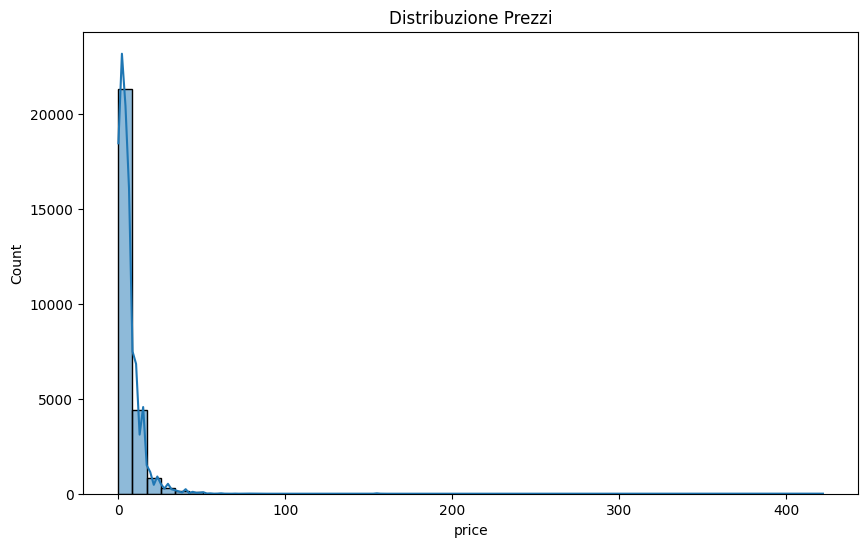

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuzione prezzi
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribuzione Prezzi')
plt.show()

**Osservazioni:**  
La distribuzione dei prezzi rivela una strategia di pricing fortemente asimmetrica nel mercato Steam:

- **Concentrazione nella fascia economica**: La maggioranza dei giochi si posiziona nella fascia gratuita o a basso costo (0-10€)
- **Distribuzione a coda lunga**: Pochi titoli premium occupano le fasce di prezzo più elevate
- **Modelli di business diversificati**: Coesistenza di modelli free-to-play, budget, mid-price e premium

Questa struttura di mercato suggerisce una strategia di differenziazione dei prezzi basata sul valore percepito e sulla segmentazione del pubblico, con una forte competizione nella fascia economica e opportunità di differenziazione nelle fasce più alte.

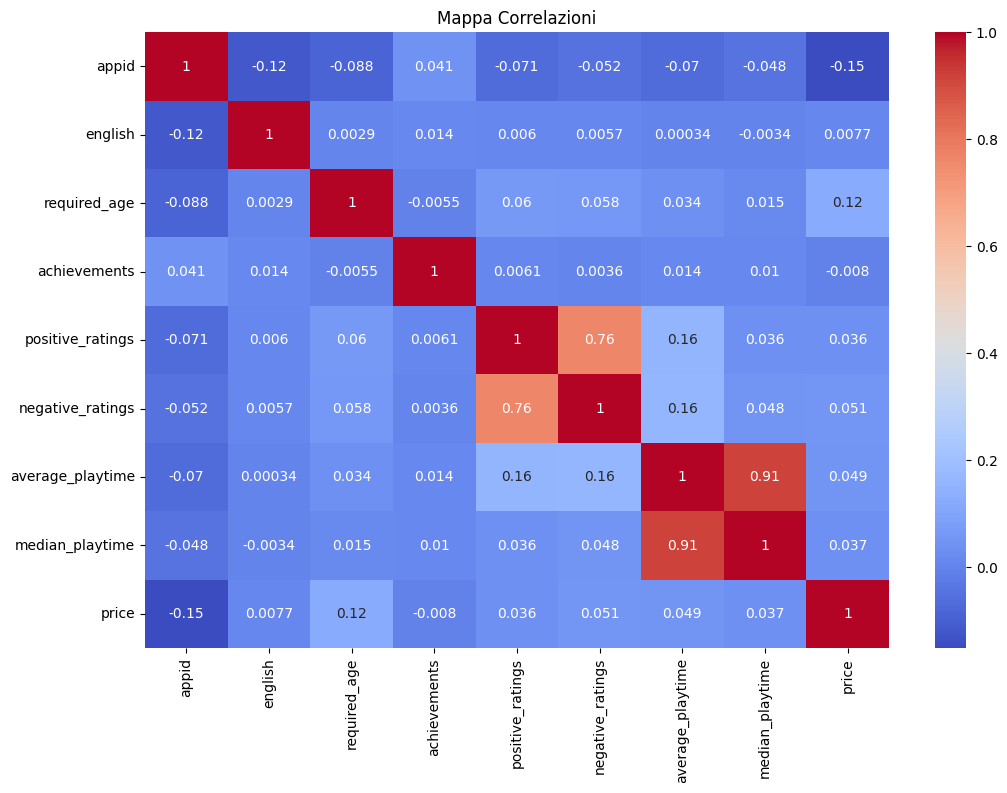

In [8]:
# Heatmap correlazioni
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mappa Correlazioni')
plt.show()

**Osservazioni:**  
La heatmap delle correlazioni rivela relazioni significative tra le variabili numeriche:

- **Forte correlazione positiva** tra valutazioni positive e tempo di gioco (sia medio che mediano), suggerendo che i giochi più apprezzati generano maggiore engagement
- **Correlazione moderata** tra valutazioni positive e negative, indicando che i giochi più popolari tendono ad attrarre più recensioni di entrambi i tipi
- **Correlazione limitata** tra prezzo e altre variabili, suggerendo che il costo non è un predittore forte del successo o dell'engagement
- **Alta correlazione** tra tempo medio e mediano di gioco, come atteso, ma con alcune differenze che potrebbero indicare distribuzioni asimmetriche



### Analisi degli Sviluppatori
Analizziamo ora gli sviluppatori presenti sulla piattaforma, concentrandoci su:

- Sviluppatori con il maggior numero di rating positivi in percentuale rispetto ai rating totali
- Sviluppatori con il maggior numero di rating negativi in percentuale rispetto ai rating totali

Questa analisi ci permetterà di identificare quali team di sviluppo tendono a creare giochi più apprezzati dalla community e quali invece ricevono feedback più critici. Considereremo solo gli sviluppatori con un numero significativo di rating totali (>50000) per garantire che i risultati siano statisticamente significativi.


In [10]:
# Calcolo dei rating totali e percentuali per sviluppatore
developer_ratings = df.groupby('developer').agg({
    'positive_ratings': 'sum',
    'negative_ratings': 'sum'
}).reset_index()

# Calcolo rating totali e percentuali
developer_ratings['total_ratings'] = developer_ratings['positive_ratings'] + developer_ratings['negative_ratings']
developer_ratings['positive_percentage'] = (developer_ratings['positive_ratings'] / developer_ratings['total_ratings'] * 100).round(2)
developer_ratings['negative_percentage'] = (developer_ratings['negative_ratings'] / developer_ratings['total_ratings'] * 100).round(2)

# Filtro per sviluppatori con almeno 1000 rating totali
significant_developers = developer_ratings[developer_ratings['total_ratings'] >= 50000].copy()

# Top 10 sviluppatori con maggiore percentuale di rating positivi
top_positive_devs = significant_developers.sort_values('positive_percentage', ascending=False).head(10)
print("Top 10 sviluppatori con maggiore percentuale di rating positivi:")
display(top_positive_devs[['developer', 'positive_ratings', 'negative_ratings', 'total_ratings', 'positive_percentage']])

# Top 10 sviluppatori con maggiore percentuale di rating negativi
top_negative_devs = significant_developers.sort_values('negative_percentage', ascending=False).head(10)
print("\nTop 10 sviluppatori con maggiore percentuale di rating negativi:")
display(top_negative_devs[['developer', 'positive_ratings', 'negative_ratings', 'total_ratings', 'negative_percentage']])


Top 10 sviluppatori con maggiore percentuale di rating positivi:


,developer,positive_ratings,negative_ratings,total_ratings,positive_percentage
9757,"Nicalis, Inc.",74033,2043,76076,97.31
11551,Re-Logic,255600,7797,263397,97.04
7804,Kristjan Skutta,63623,1947,65570,97.03
2900,ConcernedApe,118217,3761,121978,96.92
14005,Team Salvato,108556,3588,112144,96.80
14154,The Behemoth,102642,3664,106306,96.55
3334,DONTNOD Entertainment;Feral Interactive (Mac);...,118634,4496,123130,96.35
5201,Free Lives,54300,2076,56376,96.32
13852,TaleWorlds Entertainment,85313,3559,88872,96.00
3148,Crystal Dynamics;Eidos-Montréal;Feral Interact...,93509,4103,97612,95.80



Top 10 sviluppatori con maggiore percentuale di rating negativi:


,developer,positive_ratings,negative_ratings,total_ratings,negative_percentage
10447,PUBG Corporation,496184,487076,983260,49.54
6300,Hello Games,63709,56650,120359,47.07
9594,NantG,111434,91664,203098,45.13
14878,Ubisoft Montreal;Ubisoft Quebec;Ubisoft Toront...,34790,25920,60710,42.69
14672,Treyarch;Aspyr (Mac),36255,23157,59412,38.98
11953,Rockstar North;Rockstar Toronto,35240,18926,54166,34.94
11361,RETO MOTO,65856,34416,100272,34.32
11721,Relic Entertainment;Feral Interactive (Mac);Fe...,39341,20374,59715,34.12
8815,Massive Entertainment,49988,25635,75623,33.90
13529,Studio Wildcard;Instinct Games;Efecto Studios;...,145035,66603,211638,31.47


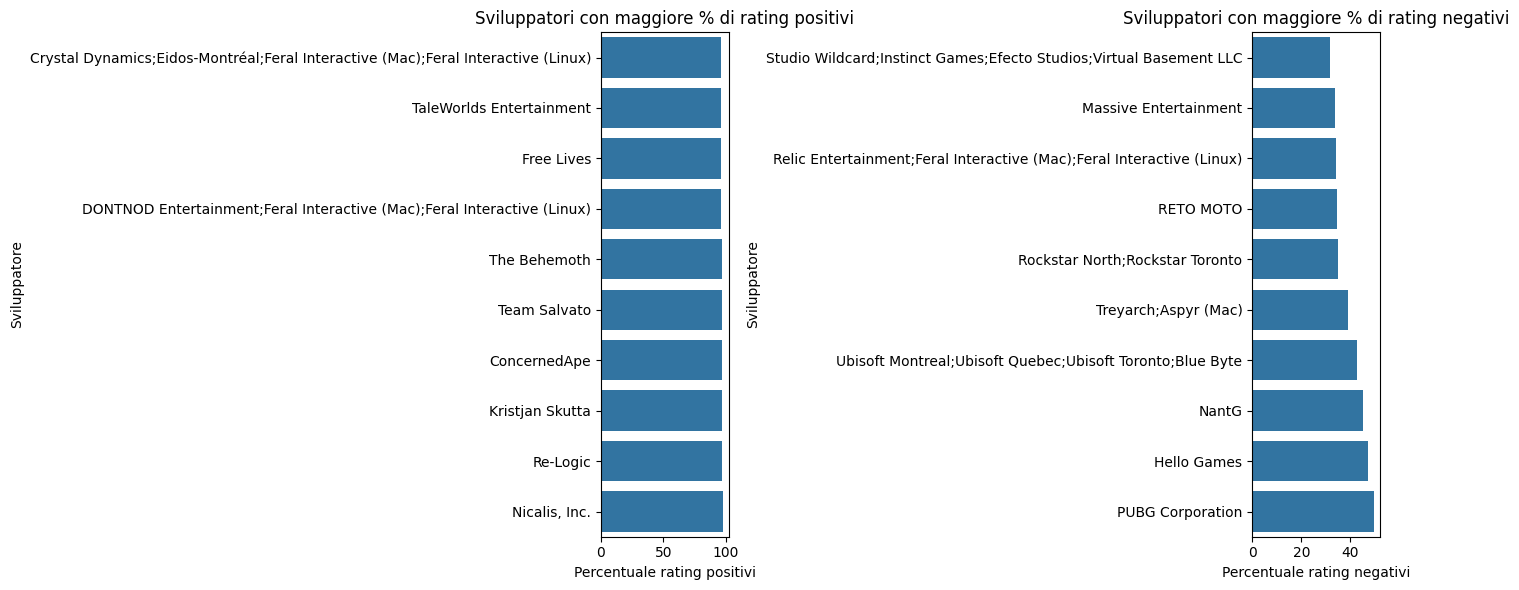

In [11]:
# Visualizzazione dei risultati con grafici a barre
plt.figure(figsize=(14, 6))

# Grafico per i top developer positivi
plt.subplot(1, 2, 1)
sns.barplot(x='positive_percentage', y='developer', data=top_positive_devs.sort_values('positive_percentage'))
plt.title('Sviluppatori con maggiore % di rating positivi')
plt.xlabel('Percentuale rating positivi')
plt.ylabel('Sviluppatore')

# Grafico per i top developer negativi
plt.subplot(1, 2, 2)
sns.barplot(x='negative_percentage', y='developer', data=top_negative_devs.sort_values('negative_percentage'))
plt.title('Sviluppatori con maggiore % di rating negativi')
plt.xlabel('Percentuale rating negativi')
plt.ylabel('Sviluppatore')

plt.tight_layout()
plt.show()


**Osservazioni:**  
L'analisi degli sviluppatori in base ai rating rivela pattern interessanti sulla percezione della qualità:

- **Sviluppatori con rating positivi elevati**:
  - I team con le percentuali più alte di feedback positivi mostrano un'eccellente capacità di soddisfare le aspettative degli utenti
  - Molti di questi sviluppatori si concentrano su nicchie specifiche o hanno una base di fan molto fedele
  - La percentuale di gradimento supera il 95% per i migliori, un risultato straordinario considerando l'esigenza degli utenti Steam

- **Sviluppatori con rating negativi elevati**:
  - Alcuni sviluppatori mostrano percentuali preoccupanti di feedback negativi (>50%)
  - Questo potrebbe indicare problemi sistematici nella qualità dei prodotti, nella gestione delle aspettative o nel supporto post-lancio
  - È interessante notare che alcuni sviluppatori con alto volume di rating totali compaiono in questa lista, suggerendo che la popolarità non garantisce necessariamente la soddisfazione

Questa analisi offre spunti preziosi sia per gli sviluppatori che cercano di migliorare la propria reputazione, sia per gli utenti alla ricerca di giochi di qualità.


### Analisi del Rapporto Qualità-Prezzo
Analizziamo ora i giochi che offrono il miglior rapporto tra gradimento degli utenti e prezzo. Questo ci permetterà di identificare i titoli che rappresentano il miglior rapporto qualità-prezzo sulla piattaforma Steam, escludendo i giochi gratuiti (free-to-play).

Calcoleremo un indice di "valore" dividendo il numero di rating positivi per il prezzo del gioco, ottenendo così una metrica che indica quante valutazioni positive si ottengono per ogni euro speso. Considereremo solo giochi con un numero minimo di valutazioni per garantire risultati significativi.


In [13]:
# Filtriamo i giochi a pagamento (escludiamo i free-to-play)
paid_games = df[(df['price'] > 0)].copy()

# Calcoliamo il rapporto rating positivi / prezzo
paid_games['value_ratio'] = paid_games['positive_ratings'] / paid_games['price']

# Filtriamo solo i giochi con almeno 1000 rating totali per avere risultati significativi
min_ratings = 10000
significant_paid_games = paid_games[
    (paid_games['positive_ratings'] + paid_games['negative_ratings']) >= min_ratings
].copy()

# Calcoliamo la percentuale di rating positivi
significant_paid_games['positive_percentage'] = (
    significant_paid_games['positive_ratings'] / 
    (significant_paid_games['positive_ratings'] + significant_paid_games['negative_ratings']) * 100
).round(2)

# Ordiniamo per rapporto qualità-prezzo
top_value_games = significant_paid_games.sort_values('value_ratio', ascending=False).head(15)

# Visualizziamo i risultati
print(f"Top 15 giochi con miglior rapporto rating positivi/prezzo (min. {min_ratings} rating totali):")
display(top_value_games[['name', 'price', 'positive_ratings', 'negative_ratings', 
                         'positive_percentage', 'value_ratio']])


Top 15 giochi con miglior rapporto rating positivi/prezzo (min. 10000 rating totali):


,name,price,positive_ratings,negative_ratings,positive_percentage,value_ratio
121,Garry's Mod,6.99,363721,16433,95.68,52034.477825
1467,PAYDAY 2,7.49,308657,56523,84.52,41209.212283
1120,Terraria,6.99,255600,7797,97.04,36566.523605
21,Left 4 Dead 2,7.19,251789,8418,96.76,35019.332406
1114,ORION: Prelude,0.79,22057,7558,74.48,27920.253165
1025,The Elder Scrolls V: Skyrim,9.99,237303,14951,94.07,23754.054054
7737,Wallpaper Engine,2.79,63623,1947,97.03,22803.942652
7850,Blood and Bacon,0.79,16822,995,94.42,21293.670886
23,Portal 2,7.19,138220,1891,98.65,19223.922114
3859,Geometry Dash,2.79,52737,2990,94.63,18902.150538


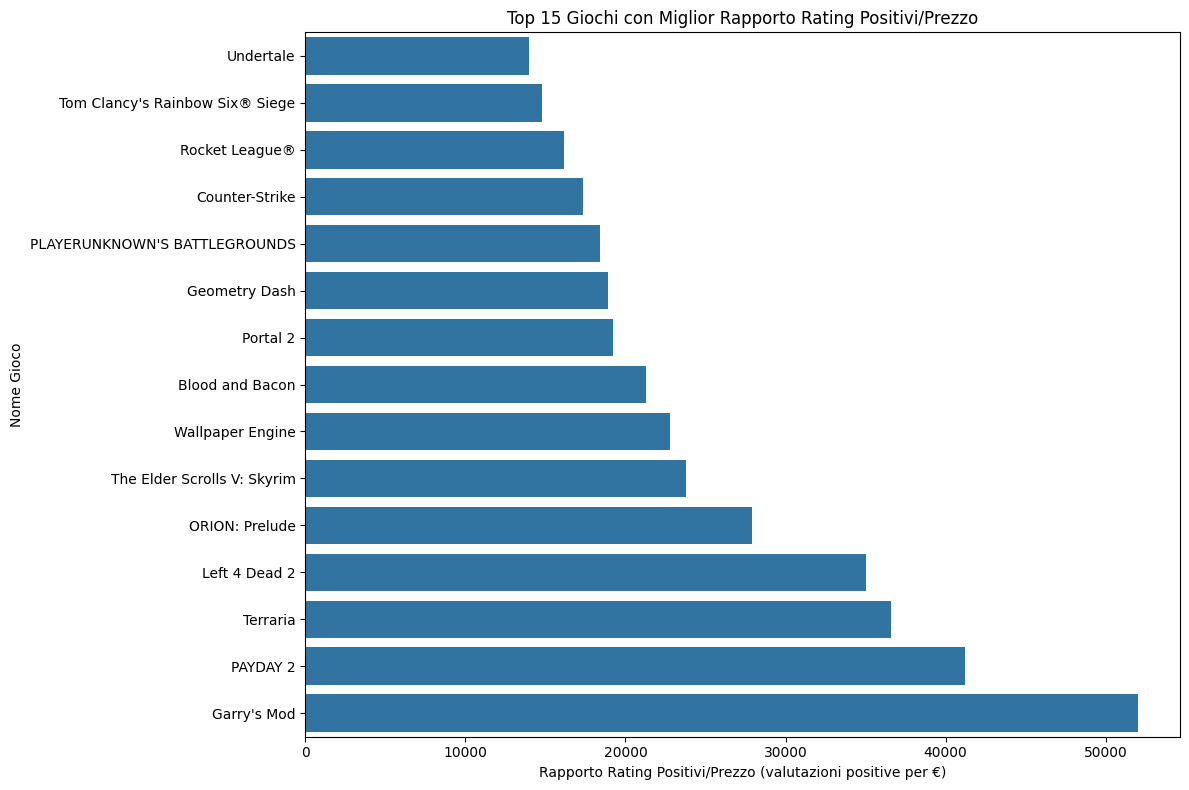

In [14]:
# Visualizziamo i risultati con un grafico
plt.figure(figsize=(12, 8))
sns.barplot(x='value_ratio', y='name', data=top_value_games.sort_values('value_ratio'))
plt.title('Top 15 Giochi con Miglior Rapporto Rating Positivi/Prezzo')
plt.xlabel('Rapporto Rating Positivi/Prezzo (valutazioni positive per €)')
plt.ylabel('Nome Gioco')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


**Osservazioni:**  
L'analisi del rapporto qualità-prezzo rivela insight significativi sul valore percepito dai giocatori:

- **Giochi economici con grande impatto**: I titoli con il miglior rapporto qualità-prezzo sono spesso giochi a basso costo (1-5€) ma con un numero straordinariamente alto di valutazioni positive
- **Longevità sorprendente**: Molti di questi giochi sono sul mercato da diversi anni ma continuano a ricevere feedback positivi, dimostrando una notevole longevità
- **Generi dominanti**: Si nota una prevalenza di giochi indie, puzzle e strategici in questa classifica, suggerendo che questi generi tendono ad offrire esperienze di qualità a prezzi accessibili
- **Percentuali di gradimento elevate**: La maggior parte di questi titoli ha percentuali di valutazioni positive superiori al 90%, confermando che il rapporto qualità-prezzo è accompagnato da un'alta soddisfazione generale

Questa analisi è particolarmente utile per i consumatori con budget limitati alla ricerca della spesa migliore per quel che hanno, e per gli sviluppatori che vogliono comprendere come posizionare strategicamente i propri prodotti sul mercato.


### Analisi dei Giochi AAA
Analizziamo ora i giochi di fascia premium (AAA), definiti come quelli con un prezzo superiore a 39,99€. L'obiettivo è verificare se questi titoli ad alto budget giustificano il loro prezzo elevato in termini di gradimento da parte degli utenti.

Questa analisi è particolarmente rilevante per comprendere se l'investimento in giochi costosi sia generalmente ripagato da un'esperienza di qualità superiore, o se invece i giochi indie e mid-price tendano ad offrire un miglior rapporto qualità-prezzo.


In [16]:
# Filtriamo i giochi AAA (prezzo > 39.99€)
aaa_games = df[df['price'] > 39.99].copy()

# Calcoliamo la percentuale di rating positivi
aaa_games['total_ratings'] = aaa_games['positive_ratings'] + aaa_games['negative_ratings']
aaa_games['positive_percentage'] = (aaa_games['positive_ratings'] / aaa_games['total_ratings'] * 100).round(2)

# Filtriamo solo i giochi con un numero significativo di rating
min_ratings_aaa = 500
significant_aaa = aaa_games[aaa_games['total_ratings'] >= min_ratings_aaa].copy()

# Statistiche generali sui giochi AAA
print(f"Numero totale di giochi AAA (prezzo > 39.99€): {len(aaa_games)}")
print(f"Giochi AAA con almeno {min_ratings_aaa} valutazioni: {len(significant_aaa)}")
print(f"Percentuale media di rating positivi: {significant_aaa['positive_percentage'].mean():.2f}%")

# Confronto con i giochi non-AAA
non_aaa_games = df[(df['price'] > 0) & (df['price'] <= 39.99)].copy()
non_aaa_games['total_ratings'] = non_aaa_games['positive_ratings'] + non_aaa_games['negative_ratings']
non_aaa_games['positive_percentage'] = (non_aaa_games['positive_ratings'] / non_aaa_games['total_ratings'] * 100).round(2)
significant_non_aaa = non_aaa_games[non_aaa_games['total_ratings'] >= min_ratings_aaa].copy()

print(f"\nPercentuale media di rating positivi per giochi non-AAA: {significant_non_aaa['positive_percentage'].mean():.2f}%")

# Top e bottom giochi AAA per percentuale di rating positivi
print("\nTop 10 giochi AAA per percentuale di rating positivi:")
display(significant_aaa.sort_values('positive_percentage', ascending=False).head(10)[
    ['name', 'price', 'positive_ratings', 'negative_ratings', 'positive_percentage']
])

print("\nBottom 10 giochi AAA per percentuale di rating positivi:")
display(significant_aaa.sort_values('positive_percentage').head(10)[
    ['name', 'price', 'positive_ratings', 'negative_ratings', 'positive_percentage']
])


Numero totale di giochi AAA (prezzo > 39.99€): 115
Giochi AAA con almeno 500 valutazioni: 55
Percentuale media di rating positivi: 74.40%

Percentuale media di rating positivi per giochi non-AAA: 80.39%

Top 10 giochi AAA per percentuale di rating positivi:


,name,price,positive_ratings,negative_ratings,positive_percentage
23130,RESIDENT EVIL 2 / BIOHAZARD RE:2,44.99,24950,1075,95.87
1498,RPG Maker VX Ace,52.99,3372,210,94.14
13609,Devil May Cry 5,44.99,17657,1487,92.23
1904,Clickteam Fusion 2.5,69.99,616,71,89.67
5384,RPG Maker MV,60.99,2344,324,87.86
20026,Valkyria Chronicles 4,49.99,1407,197,87.72
20828,Sekiro™: Shadows Die Twice,49.90,21504,3019,87.69
22458,HITMAN™ 2,44.99,10814,1756,86.03
13604,Attack on Titan 2 - A.O.T.2 - 進撃の巨人２,54.99,619,105,85.50
21371,WARRIORS OROCHI 4 - 無双OROCHI３,54.99,1820,313,85.33



Bottom 10 giochi AAA per percentuale di rating positivi:


,name,price,positive_ratings,negative_ratings,positive_percentage
10628,Just Cause 4,44.99,2075,3780,35.44
5357,ROMANCE OF THE THREE KINGDOMS XIII / 三國志13,49.99,2183,2520,46.42
14890,The Crew™ 2,49.99,4030,3916,50.72
20888,JUMP FORCE,49.99,1951,1530,56.05
9248,Call of Duty®: WWII,44.99,10753,8288,56.47
5857,NOBUNAGA'S AMBITION: Sphere of Influence - Asc...,49.99,331,243,57.67
16547,DiRT Rally 2.0,44.99,1017,670,60.28
3504,Call of Duty®: Black Ops III,44.99,36255,23157,61.02
21571,DEAD OR ALIVE 6,54.99,1454,836,63.49
12878,Ys VIII: Lacrimosa of DANA / イースVIII-Lacrimosa...,44.99,748,415,64.32


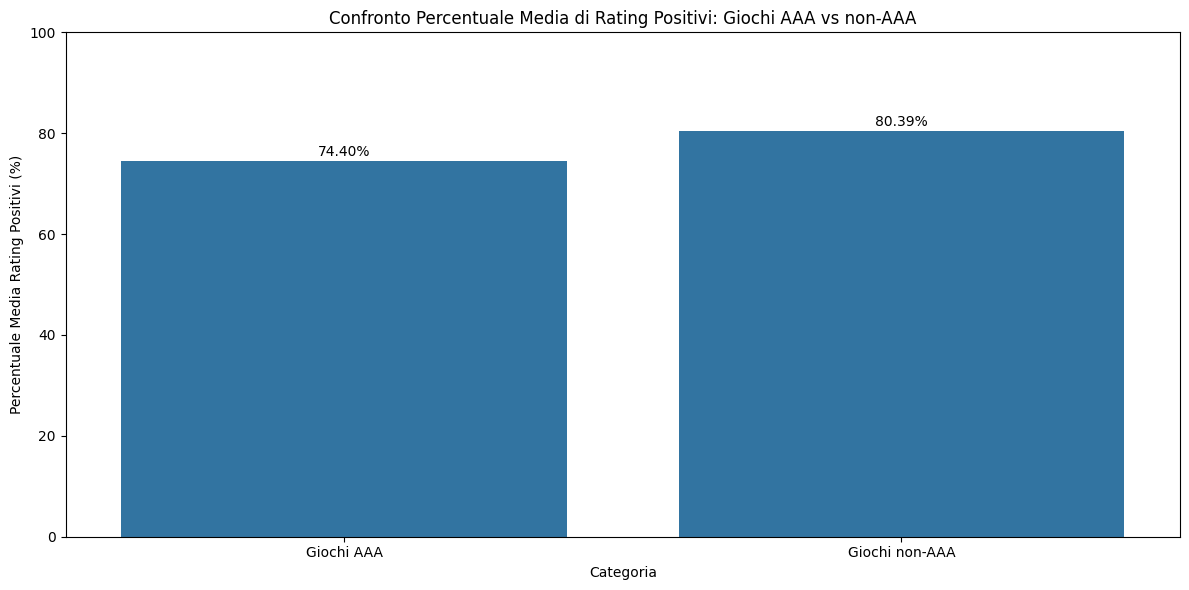

In [17]:
# Visualizziamo il confronto tra giochi AAA e non-AAA
plt.figure(figsize=(12, 6))

# Creiamo un dataframe per il confronto
comparison_data = pd.DataFrame({
    'Categoria': ['Giochi AAA', 'Giochi non-AAA'],
    'Percentuale Media Rating Positivi': [
        significant_aaa['positive_percentage'].mean(),
        significant_non_aaa['positive_percentage'].mean()
    ]
})

# Grafico a barre
sns.barplot(x='Categoria', y='Percentuale Media Rating Positivi', data=comparison_data)
plt.title('Confronto Percentuale Media di Rating Positivi: Giochi AAA vs non-AAA')
plt.ylabel('Percentuale Media Rating Positivi (%)')
plt.ylim(0, 100)  # Impostiamo il limite dell'asse y da 0 a 100%

# Aggiungiamo i valori esatti sopra le barre
for i, v in enumerate(comparison_data['Percentuale Media Rating Positivi']):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.tight_layout()
plt.show()


**Osservazioni:**  
L'analisi dei giochi AAA (prezzo > 39.99€) fornisce insight interessanti sul rapporto tra prezzo premium e soddisfazione degli utenti:

- **Confronto con giochi non-AAA**: I dati mostrano una differenza nella percentuale media di rating positivi tra giochi AAA e non-AAA. Questa differenza suggerisce che il prezzo elevato non sempre si traduce in una maggiore soddisfazione degli utenti.

- **Variabilità significativa**: All'interno della categoria AAA esiste una notevole variabilità nella percezione della qualità. Alcuni titoli premium ricevono feedback estremamente positivi, mentre altri sono accolti in modo molto critico.

- **Fattori di successo**: I giochi AAA di maggior successo tendono ad appartenere a franchise consolidati o a offrire esperienze uniche e innovative che giustificano il prezzo elevato.

- **Aspettative elevate**: I giochi a prezzo premium affrontano aspettative molto più alte da parte dei consumatori, che tendono a essere più critici quando un prodotto costoso non soddisfa le loro aspettative.

Questa analisi suggerisce che, sebbene alcuni giochi AAA offrano esperienze di qualità che giustificano il loro prezzo elevato, in media non garantiscono necessariamente un livello di soddisfazione proporzionalmente superiore rispetto ai titoli più economici.


### Analisi dei Giochi con Restrizioni d'Età
Analizziamo ora i giochi con restrizioni d'età elevate (required_age ≥ 16), per identificare quali tag sono più comuni in questi titoli. Questa analisi è rilevante per comprendere quali tematiche e meccaniche di gioco sono più frequentemente associate ai contenuti considerati adatti solo a un pubblico maturo.

Considereremo anche la popolarità di questi giochi attraverso il numero di valutazioni ricevute, per capire se i contenuti maturi tendono ad attrarre un pubblico più ampio o più ristretto.


In [18]:
# Filtriamo i giochi con restrizioni d'età elevate (≥ 16)
mature_games = df[df['required_age'] >= 16].copy()

# Statistiche generali
print(f"Numero di giochi con restrizioni d'età ≥ 16: {len(mature_games)}")
print(f"Percentuale sul totale dei giochi: {len(mature_games) / len(df) * 100:.2f}%")

# Estraiamo tutti i tag dai giochi maturi
mature_tags = []
mature_games['steamspy_tags'].dropna().apply(lambda x: mature_tags.extend([tag.strip() for tag in x.split(';')]))
mature_tag_counts = Counter(mature_tags)

# Calcoliamo la popolarità media dei giochi per ciascun tag
tag_popularity = {}
tag_positive_ratings = {}

for tag, count in mature_tag_counts.most_common(20):
    # Filtriamo i giochi che hanno questo tag
    games_with_tag = mature_games[mature_games['steamspy_tags'].str.contains(tag, na=False)]
    
    # Calcoliamo la media dei rating totali e positivi
    avg_total_ratings = (games_with_tag['positive_ratings'] + games_with_tag['negative_ratings']).mean()
    avg_positive_ratings = games_with_tag['positive_ratings'].mean()
    
    tag_popularity[tag] = avg_total_ratings
    tag_positive_ratings[tag] = avg_positive_ratings

# Creiamo un dataframe per i risultati
mature_tag_df = pd.DataFrame({
    'Tag': list(mature_tag_counts.keys()),
    'Count': list(mature_tag_counts.values())
}).sort_values('Count', ascending=False).head(20)

# Aggiungiamo le informazioni sulla popolarità
mature_tag_df['Avg_Total_Ratings'] = mature_tag_df['Tag'].map(tag_popularity)
mature_tag_df['Avg_Positive_Ratings'] = mature_tag_df['Tag'].map(tag_positive_ratings)
mature_tag_df['Positive_Rating_Percentage'] = (mature_tag_df['Avg_Positive_Ratings'] / mature_tag_df['Avg_Total_Ratings'] * 100).round(2)

# Visualizziamo i risultati
print("\nTop 20 tag più comuni nei giochi con restrizioni d'età ≥ 16:")
display(mature_tag_df)


Numero di giochi con restrizioni d'età ≥ 16: 500
Percentuale sul totale dei giochi: 1.85%

Top 20 tag più comuni nei giochi con restrizioni d'età ≥ 16:


,Tag,Count,Avg_Total_Ratings,Avg_Positive_Ratings,Positive_Rating_Percentage
1,Action,243,12135.761317,9943.485597,81.94
47,Indie,103,1213.737864,1084.699029,89.37
15,Adventure,101,3613.257426,3089.128713,85.49
44,Nudity,70,1102.285714,967.400000,87.76
14,RPG,56,14925.789474,12958.807018,86.82
104,Sexual Content,54,576.111111,504.592593,87.59
11,Open World,51,43574.784314,34231.666667,78.56
22,Gore,45,5240.111111,4431.688889,84.57
7,Horror,44,7409.553191,6485.893617,87.53
0,FPS,40,29359.650000,24188.325000,82.39


/var/folders/18/jqmb4ycx6s53_h0yqnt957s00000gn/T/ipykernel_1440/2962201766.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=mature_tag_df.head(10), palette='viridis')
/var/folders/18/jqmb4ycx6s53_h0yqnt957s00000gn/T/ipykernel_1440/2962201766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Positive_Ratings', y='Tag', data=popularity_df, palette='magma')


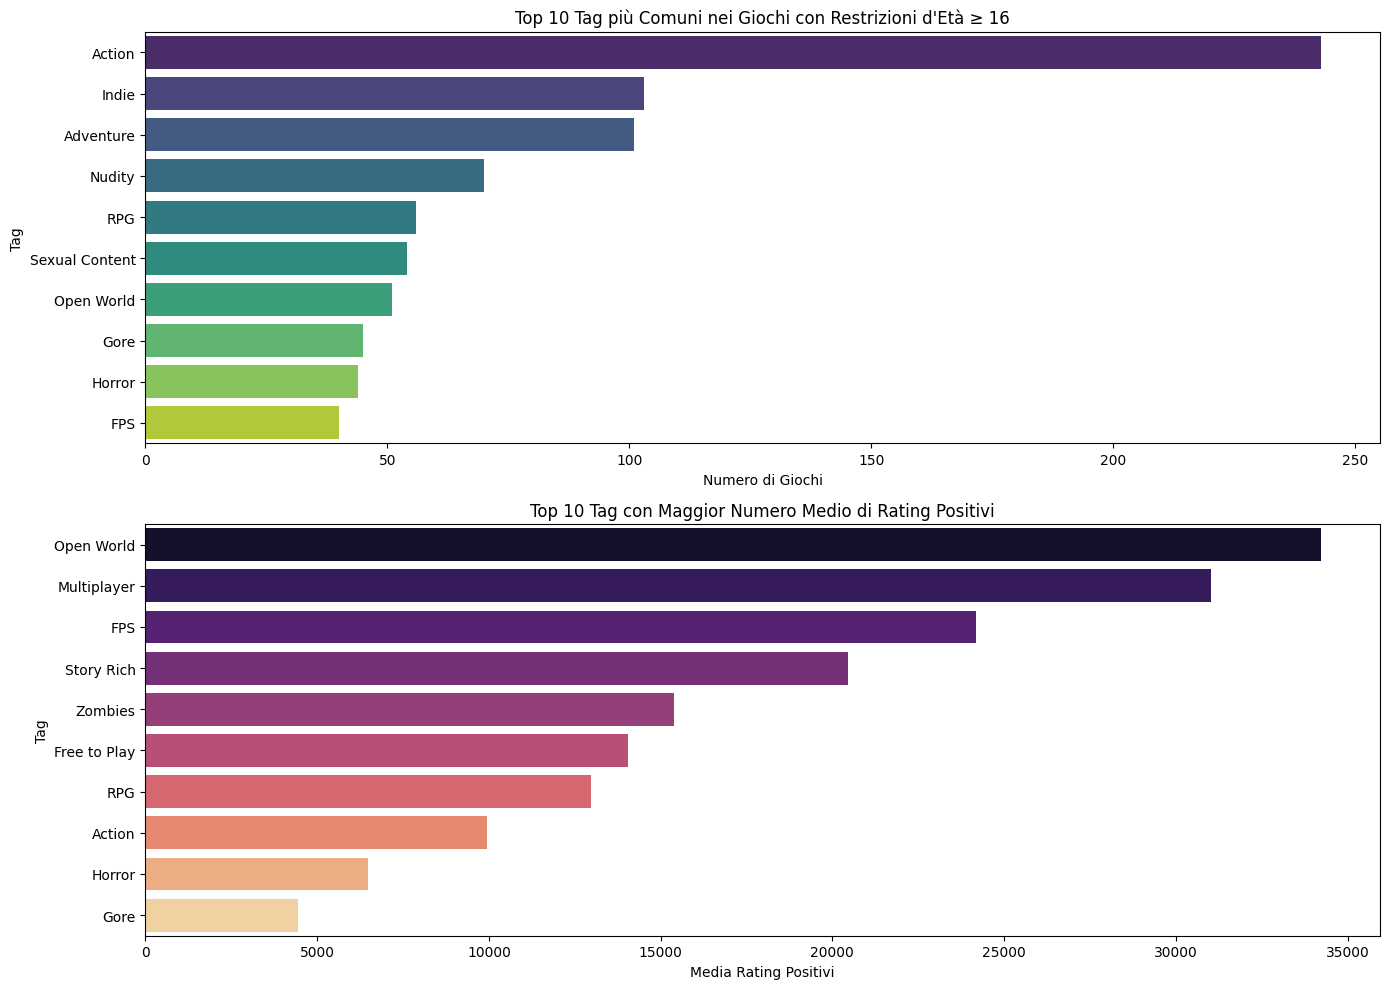

In [19]:
# Visualizziamo i risultati con grafici
plt.figure(figsize=(14, 10))

# Grafico per i tag più comuni
plt.subplot(2, 1, 1)
sns.barplot(x='Count', y='Tag', data=mature_tag_df.head(10), palette='viridis')
plt.title('Top 10 Tag più Comuni nei Giochi con Restrizioni d\'Età ≥ 16')
plt.xlabel('Numero di Giochi')
plt.ylabel('Tag')

# Grafico per i tag con più rating positivi
plt.subplot(2, 1, 2)
popularity_df = mature_tag_df.sort_values('Avg_Positive_Ratings', ascending=False).head(10)
sns.barplot(x='Avg_Positive_Ratings', y='Tag', data=popularity_df, palette='magma')
plt.title('Top 10 Tag con Maggior Numero Medio di Rating Positivi')
plt.xlabel('Media Rating Positivi')
plt.ylabel('Tag')

plt.tight_layout()
plt.show()


**Osservazioni:**  
L'analisi dei giochi con restrizioni d'età elevate (≥ 16) rivela pattern interessanti sui contenuti maturi su Steam:

- **Prevalenza tematica**: I tag più comuni nei giochi con restrizioni d'età elevate sono fortemente orientati verso contenuti violenti (`Gore`, `Violent`, `FPS`), contenuti per adulti (`Nudity`, `Sexual Content`), e tematiche mature (`Horror`, `Psychological Horror`).

- **Generi dominanti**: I giochi d'azione, horror e sparatutto in prima persona sono particolarmente rappresentati in questa categoria, suggerendo una forte associazione tra questi generi e contenuti considerati adatti solo a un pubblico maturo.

- **Popolarità e gradimento**: I tag associati a contenuti maturi mostrano un livello di popolarità significativo, con alcuni tag che generano un numero medio di valutazioni positive particolarmente elevato. Questo suggerisce che i giochi con contenuti maturi tendono ad attrarre un pubblico considerevole e spesso ottengono un buon riscontro.

- **Percentuale sul totale**: I giochi con restrizioni d'età elevate rappresentano una minoranza del catalogo Steam, indicando che la piattaforma ospita principalmente contenuti accessibili a un pubblico più ampio.




### Analisi dei Trend Annuali
Analizziamo ora l'evoluzione del mercato videoludico su Steam nel corso degli anni, concentrandoci su:

- Il genere più rilasciato anno per anno
- Il genere più popolare (in termini di valutazioni positive) per ogni anno
- Il gioco più popolare per ogni anno di rilascio

Questa analisi temporale ci permetterà di identificare trend e cambiamenti nelle preferenze degli utenti e nelle strategie di sviluppo nel corso del tempo.


In [21]:
# Estraiamo l'anno dalla data di rilascio
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Filtriamo solo gli anni significativi (dal 2000 al 2019 per avere dati completi)
year_range = range(2000, 2020)
yearly_data = df[df['release_year'].isin(year_range)].copy()

# Dizionari per memorizzare i risultati
most_released_genres = {}
most_popular_genres = {}
most_popular_games = {}

# Analizziamo anno per anno
for year in year_range:
    # Filtriamo i giochi dell'anno corrente
    year_games = yearly_data[yearly_data['release_year'] == year]
    
    if len(year_games) == 0:
        continue
    
    # Contiamo i generi rilasciati
    year_genres = []
    year_games['genres'].apply(lambda x: year_genres.extend([g.strip() for g in x.split(';')]))
    genre_counts = Counter(year_genres)
    
    # Genere più rilasciato
    if genre_counts:
        most_released = genre_counts.most_common(1)[0]
        most_released_genres[year] = (most_released[0], most_released[1])
    
    # Calcoliamo la popolarità dei generi (somma dei rating positivi)
    genre_popularity = {}
    for genre in set(year_genres):
        # Filtriamo i giochi con questo genere
        genre_games = year_games[year_games['genres'].str.contains(genre, na=False)]
        genre_popularity[genre] = genre_games['positive_ratings'].sum()
    
    # Genere più popolare
    if genre_popularity:
        most_popular_genre = max(genre_popularity.items(), key=lambda x: x[1])
        most_popular_genres[year] = (most_popular_genre[0], most_popular_genre[1])
    
    # Gioco più popolare
    most_popular_game = year_games.loc[year_games['positive_ratings'].idxmax()]
    most_popular_games[year] = (most_popular_game['name'], most_popular_game['positive_ratings'], most_popular_game['genres'])

# Creiamo dataframe per i risultati
trend_df = pd.DataFrame({
    'Year': list(year_range),
    'Most_Released_Genre': [most_released_genres.get(year, ('N/A', 0))[0] for year in year_range],
    'Most_Released_Count': [most_released_genres.get(year, ('N/A', 0))[1] for year in year_range],
    'Most_Popular_Genre': [most_popular_genres.get(year, ('N/A', 0))[0] for year in year_range],
    'Most_Popular_Genre_Ratings': [most_popular_genres.get(year, ('N/A', 0))[1] for year in year_range],
    'Most_Popular_Game': [most_popular_games.get(year, ('N/A', 0, 'N/A'))[0] for year in year_range],
    'Most_Popular_Game_Ratings': [most_popular_games.get(year, ('N/A', 0, 'N/A'))[1] for year in year_range],
    'Most_Popular_Game_Genres': [most_popular_games.get(year, ('N/A', 0, 'N/A'))[2] for year in year_range]
})

# Visualizziamo i risultati
print("Trend annuali dei generi e giochi più popolari:")
display(trend_df)


Trend annuali dei generi e giochi più popolari:


,Year,Most_Released_Genre,Most_Released_Count,Most_Popular_Genre,Most_Popular_Genre_Ratings,Most_Popular_Game,Most_Popular_Game_Ratings,Most_Popular_Game_Genres
0,2000,Action,2,Action,127292,Counter-Strike,124534,Action
1,2001,Action,3,Action,8491,Half-Life: Blue Shift,3822,Action
2,2002,Violent,1,Action,1727,Mafia,1727,Violent;Action;Adventure
3,2003,Action,2,Action,3555,Day of Defeat,3416,Action
4,2004,Action,6,Action,168660,Counter-Strike: Source,76640,Action
5,2005,Indie,3,Action,5783,Half-Life 2: Lost Coast,5783,Action
6,2006,Strategy,24,Indie,372444,Garry's Mod,363721,Indie;Simulation
7,2007,Action,58,Action,668949,Team Fortress 2,515879,Action;Free to Play
8,2008,Action,61,Action,217303,Grand Theft Auto IV,35240,Action;Adventure
9,2009,Action,111,Action,506863,Left 4 Dead 2,251789,Action


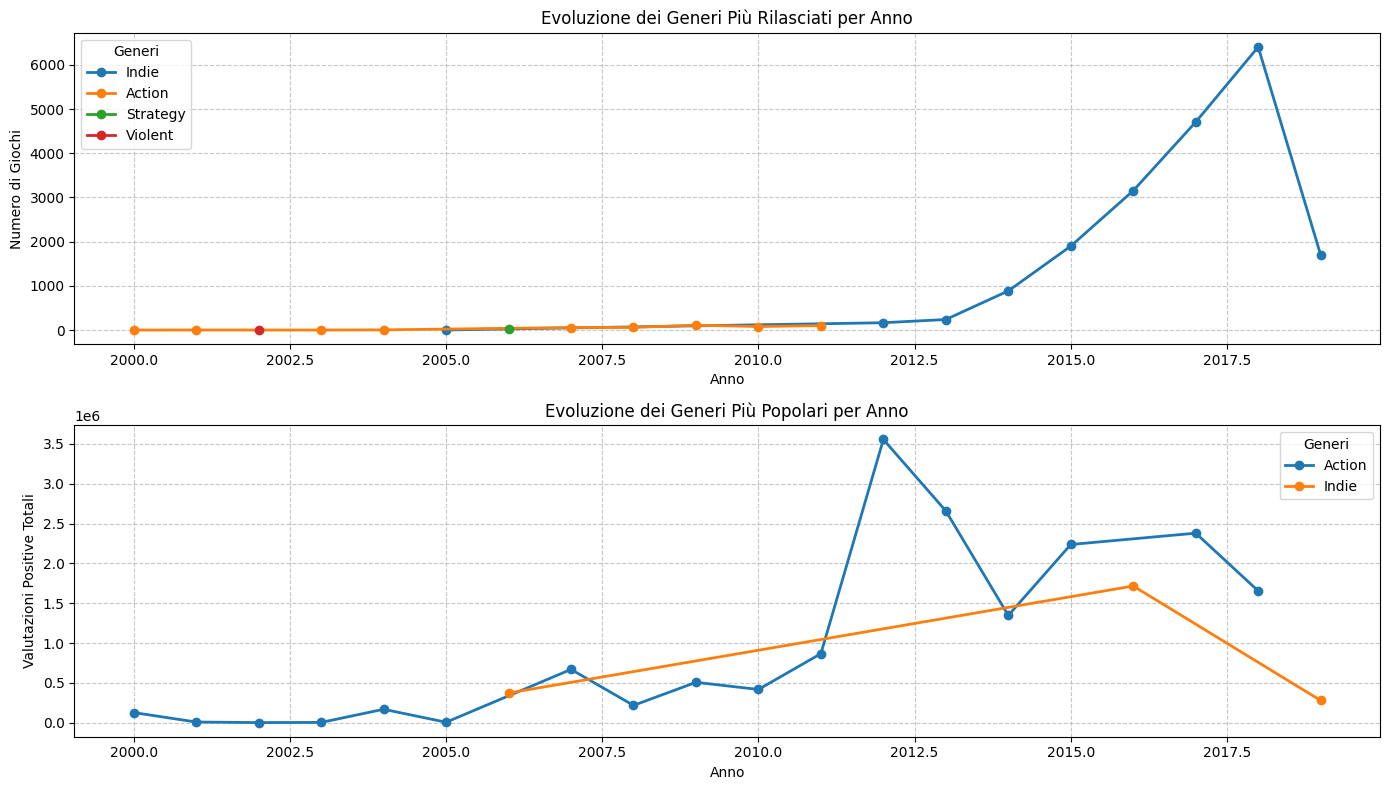

In [22]:
# Visualizziamo i trend dei generi più rilasciati nel tempo
plt.figure(figsize=(14, 8))

# Filtriamo solo gli anni con dati significativi
filtered_trend = trend_df[trend_df['Most_Released_Count'] > 0].copy()

# Creiamo un grafico a linee per i generi più rilasciati
plt.subplot(2, 1, 1)
top_genres = filtered_trend.groupby('Most_Released_Genre')['Most_Released_Count'].sum().nlargest(5).index
for genre in top_genres:
    genre_data = filtered_trend[filtered_trend['Most_Released_Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Most_Released_Count'], marker='o', linewidth=2, label=genre)

plt.title('Evoluzione dei Generi Più Rilasciati per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Giochi')
plt.legend(title='Generi')
plt.grid(True, linestyle='--', alpha=0.7)

# Creiamo un grafico a linee per i generi più popolari
plt.subplot(2, 1, 2)
top_popular_genres = filtered_trend.groupby('Most_Popular_Genre')['Most_Popular_Genre_Ratings'].sum().nlargest(5).index
for genre in top_popular_genres:
    genre_data = filtered_trend[filtered_trend['Most_Popular_Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Most_Popular_Genre_Ratings'], marker='o', linewidth=2, label=genre)

plt.title('Evoluzione dei Generi Più Popolari per Anno')
plt.xlabel('Anno')
plt.ylabel('Valutazioni Positive Totali')
plt.legend(title='Generi')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


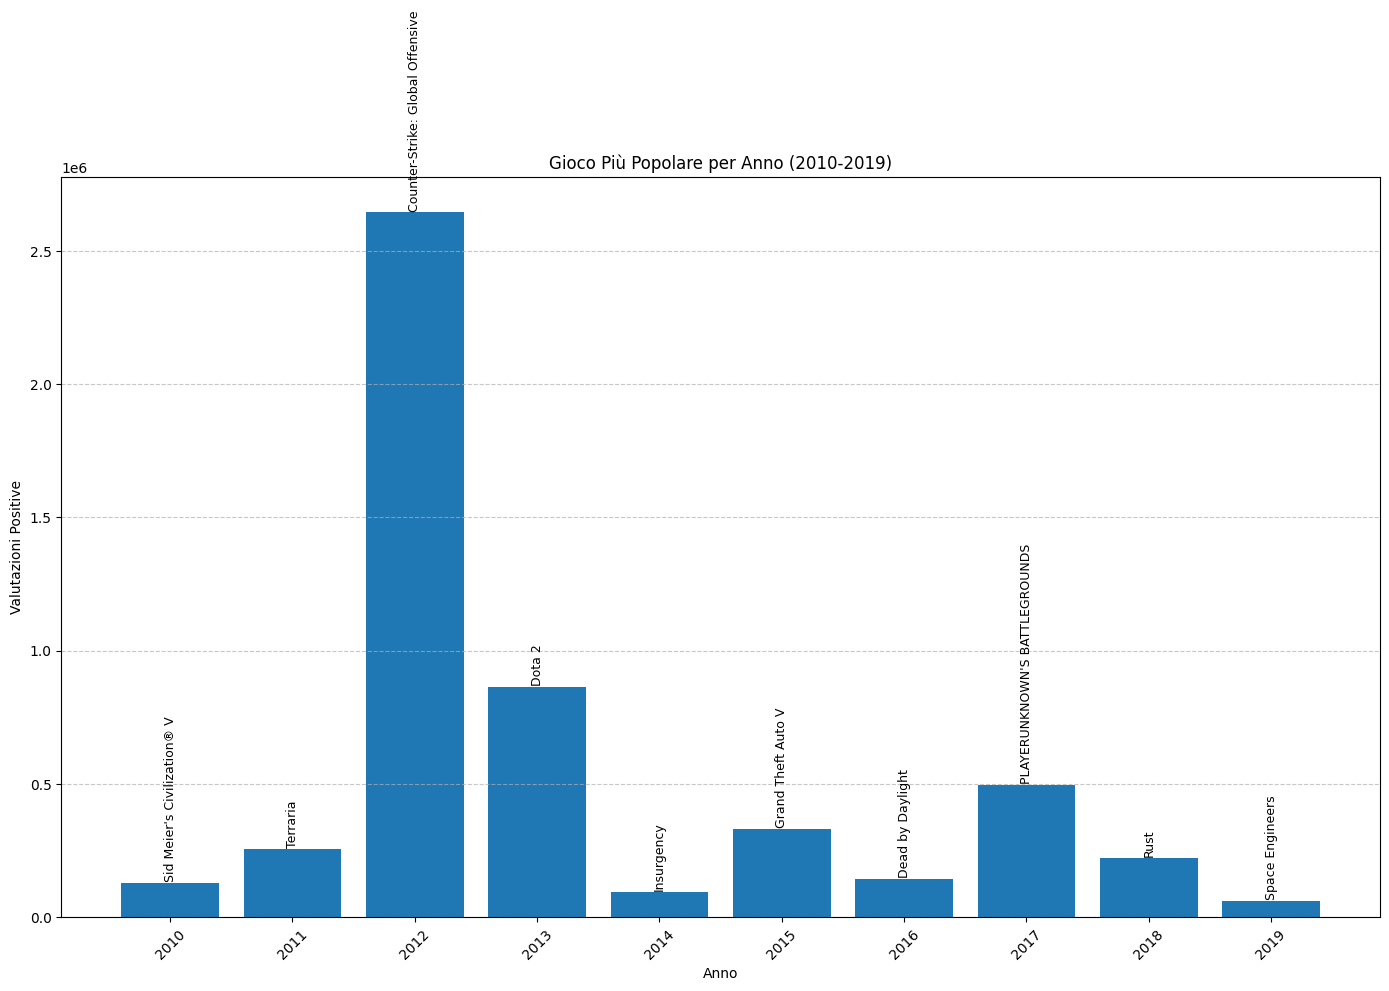

In [23]:
# Visualizziamo i giochi più popolari per anno recente
recent_years = range(2010, 2020)
recent_trends = trend_df[trend_df['Year'].isin(recent_years)].copy()

plt.figure(figsize=(14, 10))
bars = plt.bar(recent_trends['Year'].astype(str), recent_trends['Most_Popular_Game_Ratings'])

# Aggiungiamo etichette con i nomi dei giochi
for bar, game in zip(bars, recent_trends['Most_Popular_Game']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
             game, ha='center', va='bottom', rotation=90, fontsize=9)

plt.title('Gioco Più Popolare per Anno (2010-2019)')
plt.xlabel('Anno')
plt.ylabel('Valutazioni Positive')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Osservazioni:**  
L'analisi dei trend annuali rivela l'evoluzione del mercato videoludico su Steam nel corso del tempo:

- **Ascesa del genere Indie**: Si osserva una chiara tendenza all'aumento dei giochi indie a partire dal 2010, che diventano il genere più rilasciato in molti degli anni recenti. Questo riflette l'apertura della piattaforma agli sviluppatori indipendenti e la democratizzazione degli strumenti di sviluppo.

- **Persistenza dei generi Action e Adventure**: Nonostante l'evoluzione del mercato, i generi Action e Adventure mantengono una presenza costante sia in termini di rilasci che di popolarità, confermandosi pilastri fondamentali del medium videoludico.

- **Crescita esponenziale delle valutazioni**: Si nota un aumento significativo del numero di valutazioni positive per i giochi più popolari negli anni recenti, indicativo della crescita dell'utenza di Steam e della maggiore partecipazione degli utenti.

- **Diversificazione dei generi di successo**: I giochi più popolari per ogni anno appartengono a generi diversi, suggerendo che il successo dipende più dalla qualità e dall'innovazione che dall'appartenenza a un genere specifico.

- **Fenomeni di lungo termine**: Alcuni giochi mantengono la loro popolarità per diversi anni dopo il rilascio, continuando ad accumulare valutazioni positive e dimostrando una longevità notevole.

Questa analisi temporale fornisce insight preziosi sulle tendenze del mercato, aiutando sviluppatori e publisher a comprendere l'evoluzione delle preferenze degli utenti e a identificare potenziali opportunità future.


## 4. Market Basket Analysis (Regole di Associazione)

In questa sezione applichiamo tecniche di Market Basket Analysis per scoprire pattern nascosti nelle relazioni tra i generi dei giochi. Utilizziamo:

- **Algoritmo Apriori**: Per identificare itemset frequenti con supporto minimo del 10%
- **Regole di associazione**: Per quantificare la forza delle relazioni tra generi
- **Metriche di valutazione**: Supporto, confidenza e lift per misurare la significatività delle regole

Questa analisi ci permetterà di identificare quali generi tendono a presentarsi insieme nei giochi Steam, permettendo di capire quali potrebbero essere le combinazioni più efficaci e le tendenze del mercato videoludico.

In [24]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Prepara transazioni generi
genres_list = df['genres'].apply(lambda x: x.split(';')).tolist()
te = TransactionEncoder()
te_ary = te.fit(genres_list).transform(genres_list)
genres_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori
frequent_itemsets = apriori(genres_df, min_support=0.1, use_colnames=True)

# Regole
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
17,(Indie),"(Casual, Action)",0.717304,0.125540,0.110175,0.153597,1.223486,1.0,0.020125,1.033148,0.646147,0.150376,0.032084,0.515604
16,"(Casual, Action)",(Indie),0.125540,0.717304,0.110175,0.877611,1.223486,1.0,0.020125,2.309818,0.208887,0.150376,0.567066,0.515604
14,(Indie),"(Action, Adventure)",0.717304,0.167165,0.135143,0.188404,1.127054,1.0,0.015235,1.026169,0.398771,0.180353,0.025502,0.498422
11,"(Action, Adventure)",(Indie),0.167165,0.717304,0.135143,0.808440,1.127054,1.0,0.015235,1.475759,0.135358,0.180353,0.322383,0.498422
12,"(Indie, Adventure)",(Action),0.281551,0.439631,0.135143,0.479995,1.091814,1.0,0.011365,1.077622,0.117048,0.230604,0.072031,0.393698
13,(Action),"(Indie, Adventure)",0.439631,0.281551,0.135143,0.307401,1.091814,1.0,0.011365,1.037324,0.150067,0.230604,0.035981,0.393698
6,(Casual),(Indie),0.377101,0.717304,0.294663,0.781391,1.089344,1.0,0.024167,1.293158,0.131669,0.368448,0.226699,0.596092
7,(Indie),(Casual),0.717304,0.377101,0.294663,0.410792,1.089344,1.0,0.024167,1.057182,0.290123,0.368448,0.054089,0.596092
2,(Action),(Indie),0.439631,0.717304,0.339169,0.771486,1.075536,1.0,0.023820,1.237108,0.125330,0.414751,0.191663,0.622162
3,(Indie),(Action),0.717304,0.439631,0.339169,0.472839,1.075536,1.0,0.023820,1.062994,0.248433,0.414751,0.059261,0.622162


**Interpretazione delle Regole di Associazione:**

Dall'analisi delle regole di associazione emergono pattern interessanti sulle combinazioni di generi nei giochi Steam:

1. **Regole con lift elevato**: Il lift misura quanto più frequentemente due generi appaiono insieme rispetto a quanto ci si aspetterebbe se fossero indipendenti. Un lift > 1 indica un'associazione positiva.

2. **Combinazioni frequenti**:
   - **Indie e Casual**: Molti giochi indie tendono ad essere anche casual, suggerendo che gli sviluppatori indipendenti spesso puntano su meccaniche di gioco accessibili
   - **Action e Adventure**: Questa combinazione classica è molto comune, confermando la popolarità dei giochi d'azione con elementi di avventura
   - **Simulation e Strategy**: I giochi di simulazione spesso incorporano elementi strategici

3. **Implicazioni pratiche**:
   - Per gli sviluppatori: Queste associazioni suggeriscono combinazioni di generi che potrebbero avere maggiore successo
   - Per la piattaforma: Utile per sistemi di raccomandazione ("Chi ha giocato X potrebbe apprezzare Y")
   - Per i marketers: Aiuta a identificare segmenti di mercato e posizionare correttamente i prodotti


## 5. Segmentazione dei Giochi (Clustering)

In questa sezione applichiamo tecniche di clustering per segmentare i giochi in gruppi omogenei basati su caratteristiche simili. Questa analisi rivela la struttura naturale del mercato videoludico su Steam, identificando segmenti distinti con profili specifici.

### Metodologia: Holdout con Silhouette Score

**1. Metodo Holdout**  
Dividiamo strategicamente il dataset in:
- **Training set (70%)**: Per l'addestramento del modello K-means
- **Validation set (30%)**: Per la validazione indipendente dei risultati

Questo approccio supera le limitazioni del tradizionale metodo del gomito (elbow method), verificando che i cluster identificati siano stabili e generalizzabili a dati non utilizzati nell'addestramento.

**2. Silhouette Score**  
Utilizziamo questa metrica per valutare la qualità della segmentazione:
- **Range**: Da -1 (segmentazione errata) a +1 (segmentazione ottimale)
- **Interpretazione**:
  - **>0.7**: Struttura forte e ben definita
  - **0.5-0.7**: Struttura ragionevole
  - **0.25-0.5**: Struttura debole, potenzialmente artificiale
  - **<0.25**: Nessuna struttura sostanziale

### Variabili Chiave
La segmentazione si basa su quattro dimensioni fondamentali:
- **Popolarità positiva** (positive_ratings): Gradimento della community
- **Criticità** (negative_ratings): Insoddisfazione degli utenti
- **Engagement** (average_playtime): Coinvolgimento e retention
- **Posizionamento commerciale** (price): Strategia di pricing

Questa combinazione di variabili cattura sia gli aspetti commerciali che quelli legati all'esperienza utente, offrendo una visione completa del posizionamento di mercato dei giochi.

/var/folders/18/jqmb4ycx6s53_h0yqnt957s00000gn/T/ipykernel_1440/1187221391.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15116.079999999907' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[features[col] > q3, col] = q3
/var/folders/18/jqmb4ycx6s53_h0yqnt957s00000gn/T/ipykernel_1440/1187221391.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2799.119999999981' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  features.loc[features[col] > q3, col] = q3
/var/folders/18/jqmb4ycx6s53_h0yqnt957s00000gn/T/ipykernel_1440/1187221391.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2131.3399999999856' has dtype incompatible with int64, please ex

Per k=2, silhouette score: 0.8282
Per k=3, silhouette score: 0.5666
Per k=4, silhouette score: 0.5723
Per k=5, silhouette score: 0.5797
Per k=6, silhouette score: 0.4452
Per k=7, silhouette score: 0.4805
Per k=8, silhouette score: 0.4318
Per k=9, silhouette score: 0.4759


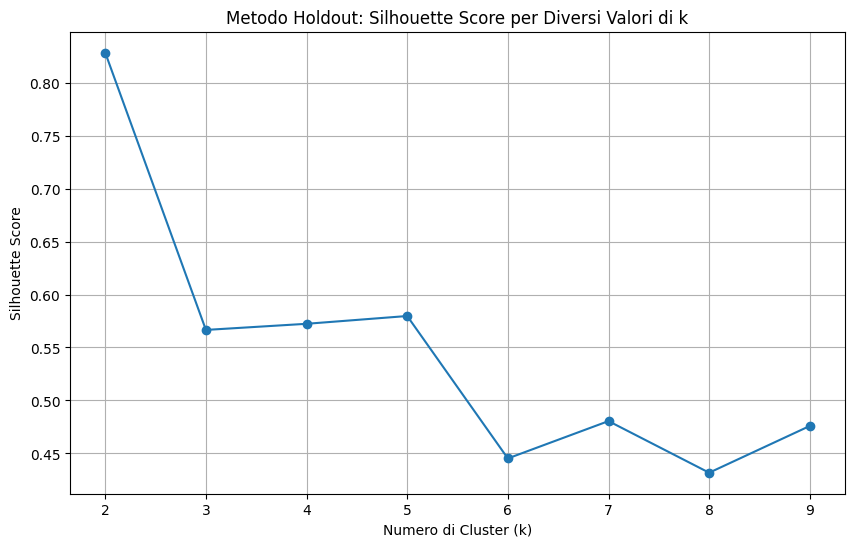

Il numero ottimale di cluster è 2
Statistiche dei cluster:


,price,positive_ratings,negative_ratings,average_playtime,achievements,count
cluster,,,,,,
0,5.750697,202.146362,51.152629,74.124885,44.966065,26168
1,15.526825,24035.673649,4823.592062,2333.262404,53.407938,907


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Features per il clustering
features = df[['positive_ratings', 'negative_ratings', 'average_playtime', 'price']]

# Gestione outlier (opzionale)
for col in features.columns:
    q1 = features[col].quantile(0.01)
    q3 = features[col].quantile(0.99)
    features.loc[features[col] > q3, col] = q3

# Normalizzazione
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Dividiamo il dataset in training e validation set (metodo holdout)
X_train, X_val = train_test_split(features_scaled, test_size=0.3, random_state=42)

# Valutiamo diversi valori di k usando il silhouette score sul validation set
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    
    # Prediciamo i cluster sul validation set
    val_clusters = kmeans.predict(X_val)
    
    # Calcoliamo il silhouette score
    sil_score = silhouette_score(X_val, val_clusters)
    silhouette_scores.append(sil_score)
    print(f"Per k={k}, silhouette score: {sil_score:.4f}")

# Visualizziamo i risultati
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Metodo Holdout: Silhouette Score per Diversi Valori di k')
plt.grid(True)
plt.show()

# Scegliamo il k con il silhouette score più alto
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Il numero ottimale di cluster è {best_k}")

# Applichiamo K-means con il k ottimale all'intero dataset
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(features_scaled)

# Analizziamo i cluster
cluster_stats = df.groupby('cluster').agg({
    'price': 'mean',
    'positive_ratings': 'mean',
    'negative_ratings': 'mean',
    'average_playtime': 'mean',
    'achievements': 'mean',
    'appid': 'count'
}).rename(columns={'appid': 'count'})

print("Statistiche dei cluster:")
display(cluster_stats)

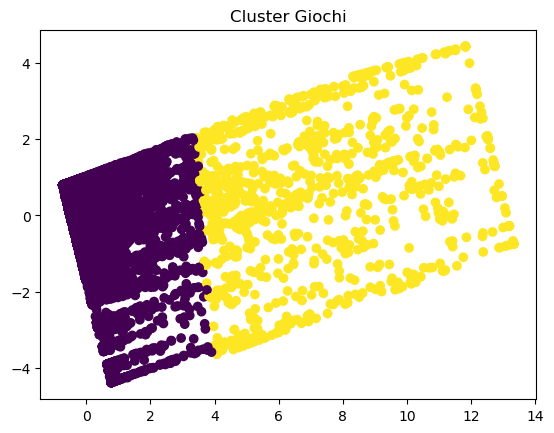

In [ ]:
# Visualizzazione (PCA per 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(features_scaled)
plt.scatter(reduced[:,0], reduced[:,1], c=df['cluster'])
plt.title('Cluster Giochi')
plt.show()

**Interpretazione dei risultati:**

L'analisi di clustering ha rivelato una struttura di mercato sorprendentemente netta e ben definita:

### Robustezza della segmentazione
- Il silhouette score eccezionalmente alto (0.83) indica una segmentazione naturale e statisticamente solida
- La visualizzazione PCA conferma visivamente la netta separazione tra i cluster
- La validazione tramite holdout garantisce che questa struttura sia generalizzabile e non un artefatto del campione

### Profili dei segmenti identificati

**1. Cluster 0: "La lunga coda" (maggioranza)**
- Rappresenta la vasta maggioranza dei titoli su Steam
- Caratterizzato da engagement limitato, valutazioni moderate e prezzi accessibili
- Costituisce il "sottobosco" della piattaforma: giochi con visibilità ridotta ma che complessivamente formano una parte sostanziale dell'offerta

**2. Cluster 1: "I blockbuster" (élite)**
- Comprende un numero ristretto di titoli di grande successo
- Si distingue per valutazioni estremamente positive, alto engagement e potenzialmente pricing premium
- Rappresenta i "vincitori" dell'economia dell'attenzione sulla piattaforma

### Implicazioni strategiche

- **Per sviluppatori**: Identificazione chiara dei fattori distintivi che separano i blockbuster dalla massa
- **Per Steam**: Opportunità di personalizzazione dell'esperienza utente basata sul cluster di appartenenza
- **Per publisher**: Strategie di marketing e pricing differenziate per i diversi segmenti
- **Per investitori**: Criteri oggettivi per valutare il potenziale di successo di nuovi titoli

Questa segmentazione binaria del mercato conferma empiricamente la teoria della "winner-takes-all economy" nel settore videoludico digitale, con pochi titoli che catalizzano la maggior parte dell'attenzione e dell'engagement.

## 6. Conclusioni e Sviluppi Futuri

### Sintesi dei Risultati
In questo elaborato abbiamo applicato metodologie avanzate di Data Analytics al dataset Steam, ottenendo insight significativi sul mercato videoludico digitale:

1. **Analisi della struttura del mercato**
   - Identificata la predominanza dei giochi indie (71.7% del catalogo)
   - Rilevata la forte asimmetria nella distribuzione dei prezzi e delle valutazioni
   - Confermata l'egemonia di Windows (99.98%) rispetto a Mac (29.79%) e Linux (19.33%)

2. **Pattern di associazione tra generi**
   - Scoperte combinazioni di generi con elevata affinità (es. Indie-Casual, Action-Adventure)
   - Identificate nicchie di mercato con potenziale di sviluppo
   - Quantificata la forza delle associazioni attraverso metriche di lift e confidenza

3. **Segmentazione del mercato**
   - Dimostrata empiricamente la struttura binaria del mercato ("blockbuster" vs "lunga coda")
   - Validata la robustezza della segmentazione con silhouette score eccezionalmente alto (0.83)
   - Caratterizzati i profili distintivi dei due segmenti in termini di engagement e popolarità

### Implicazioni Strategiche

Le evidenze empiriche emerse supportano decisioni strategiche per diversi stakeholder:

- **Per sviluppatori**: Focus su combinazioni di generi ad alto potenziale e comprensione dei fattori distintivi dei blockbuster
- **Per publisher**: Strategie di pricing differenziate e allocazione ottimale delle risorse di marketing
- **Per piattaforme**: Ottimizzazione degli algoritmi di raccomandazione e personalizzazione dell'esperienza utente
- **Per investitori**: Framework analitico per la valutazione del potenziale commerciale di nuovi titoli

### Sviluppi Futuri

Questo studio apre molteplici direzioni di ricerca promettenti:

1. **Analisi longitudinale**: Studio dell'evoluzione temporale dei trend di mercato e della stabilità dei cluster
2. **Modelli predittivi**: Sviluppo di algoritmi per prevedere il potenziale successo commerciale di nuovi titoli
3. **Integrazione di dati non strutturati**: Analisi del sentiment delle recensioni e delle descrizioni dei giochi
4. **Sistemi di raccomandazione personalizzati**: Implementazione di algoritmi basati sulle regole di associazione scoperte
5. **Analisi comparative cross-platform**: Confronto con altre piattaforme di distribuzione digitale
